In [47]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["scicore"].find({})))

# Scicore Comparison

This notebook is used to compare the tlsh and ssdeep hashes of the scicore dataset.
First I will compare the tlsh hashes and then the ssdeep hashes.



In [48]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...
4,4,OCaml,3eee2da2d713d971e6618b2f089d08e495c0cd8ec722f7...,13173764,{'ssdeep': '49152:lZBmaeQesTwicgVOMB4aJZhYw2UN...,sdhash hash,{'tlsh': 'T1F6D6E80EBB470662CD9809FE8CD5868FD6...,Machoc hash,{'strings': 'T1AC75D50CF4B0A5622CC2F4AFFB0DF68...
...,...,...,...,...,...,...,...,...,...
1985,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T1BF92F818E81B4677B25345F37B8A548...
1986,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...
1987,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN
1988,1988,ChimPipe,6cbb727cbfb1fb6335e4439ae7810e143e1bcc69b05ca0...,76135,{'ssdeep': '1536:Sw5j4LB3dUalDarob+tltydxgjmzB...,sdhash hash,{'tlsh': 'T101734B13B0959D7AC4478A301AC7823B99...,Machoc hash,{'strings': 'T1CD32B7163C74AAB109D289B2B754859...


(0.0, 100.0)

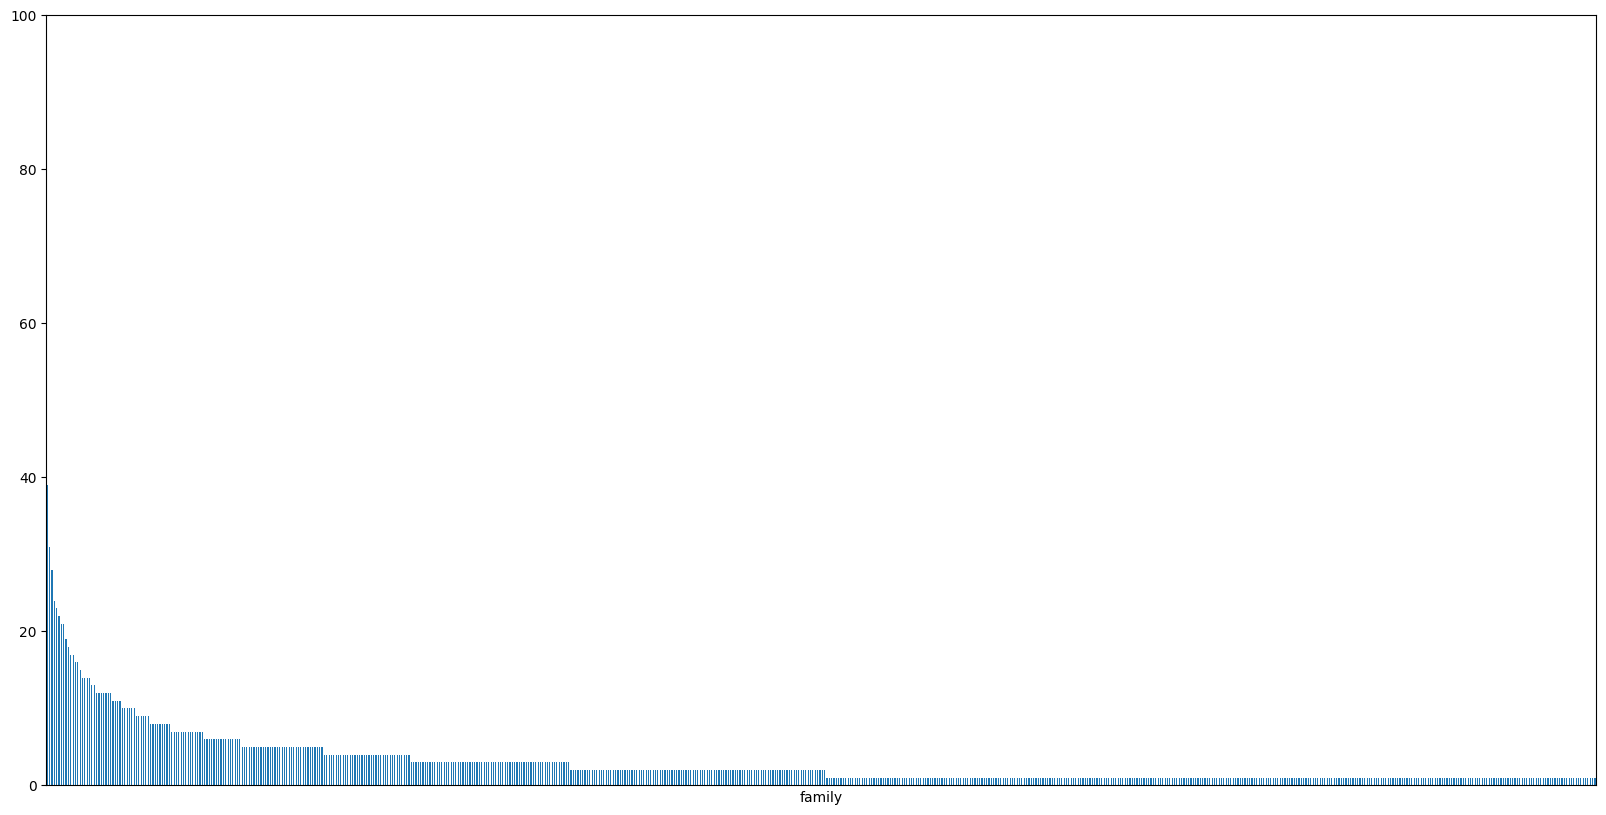

In [49]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]
family_counts.plot(kind='bar', figsize=(20, 10))
plt.xticks([])
plt.ylim(0, 100)

# Scicore Filtered

This is the filtered dataset with only families that have more than one entry. Since comparing the binary to itself can be done with SHA256, I will skip the families with only 1 entry.

In [50]:
scicore_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...
...,...,...,...,...,...,...,...,...,...
1983,1983,help2man,79bbee7e82e8cab0f238bc135ec79543a071371cddeb11...,19871,{'ssdeep': '384:sALj4CCJ8/eQyWvPX+ejZbCOL3npSe...,sdhash hash,{'tlsh': 'T13092F805EA2A8637B15301F77FDA54D09B...,Machoc hash,NaN
1984,1984,help2man,2a1400af01f63f02b64889eb203ed60eee4014a4d4ded2...,19896,{'ssdeep': '384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeL...,sdhash hash,{'tlsh': 'T1EC92F905EA2A8637B15301F77FDA54C09B...,Machoc hash,{'strings': 'T1FD92E808E81B4677B25341F37B8A548...
1985,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T1BF92F818E81B4677B25345F37B8A548...
1986,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...


In [51]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = scicore_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")
print

Original DataFrame had 1990 rows.
Filtered DataFrame has 1662 rows.
Families removed (only had 1 entry): ['andi', 'VIGRA', 'GCC_nvptx_none', 'MAKER', 'bwa-mem2', 'ruamel.yaml', 'RADtools', 'Gossamer', 'tax2tree', 'APBS', 'FastQTL', 'ChimPipe', 'MOE', 'GeneMark-ET', 'OpenSSL', 'Mercurial', 'dashing2', 'BioPerl', 'archspec', 'CARNAC-LR', 'Tombo', 'OPARI2', 'SKA', 'imake', 'Structure', 'MySQL', 'HipMer', 'smalt', 'SCANMS', 'PhyloBayes-MPI', 'CONTRAfold', 'BLASR', 'ZORRO', 'Singularity', 'circlator', 'COMSOL', 'Miniconda2', 'INRICH', 'GenomeThreader', 'coevol', 'Check', 'PASApipeline', 'Caffe_unet', 'Transrate', 'QUAST', 'EPACTS', 'Co-phylog', 'makeinfo', 'MaCH', 'Piranha', 'how_are_we_stranded_here', 'panaroo', 'NiBabel', 'MPJ-Express', 'Magic-BLAST', 'UCLUST', 'ngs-barcode-count-c', 'FLASH2', 'ProModII', 'uchime', 'bcl2fastq', 'vcflib', 'Pindel', 'LAMMPS', 'eval', 'clearcut', 'flatbuffers', 'Kent_tools', 'Chiron', 'RAD', 'AutoDockSuite', 'spaln', 'ELPA', 'ECL', 'SNP-sites', 'SNAP-HMM', '

<function print>

In [52]:
len(scicore_filtered['family'].unique())

332

Example: Get the tlsh hash of the first entry (DIAMOND) and compare to all other entries.

In [53]:
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []

for family, group in scicore_filtered.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()

    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)

    tlsh_diffs = [tlsh.diff(a["tlsh"], b["tlsh"]) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a["ssdeep"], b["ssdeep"]) for a, b in ssdeep_combinations]

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)

<Axes: >

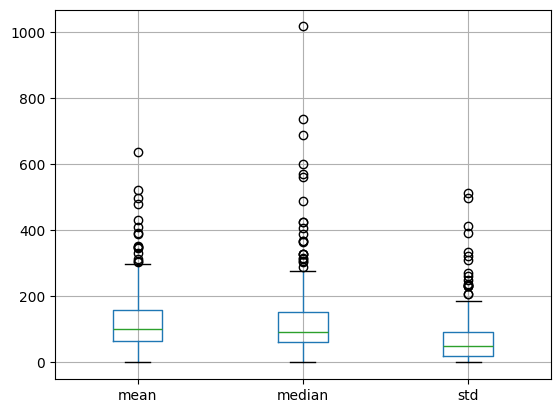

In [54]:
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()

<Axes: >

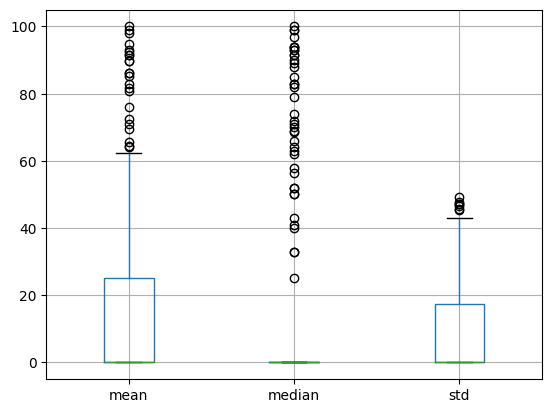

In [55]:
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()

# ROC Curve

To correctly get a ROC curve, 4 values are essential: TP, FP, TN, FN.

The problem currently is, that I do not have other samples which can have no match. All the samples have a match and therefore the TN rate is 0. Thus, I will add the same amount of malware samples and concatenate with the scicore db.

In [56]:
scicore_filtered["malware"] = False
size = scicore_filtered.shape[0] / 20
malware = pd.DataFrame(list(db["malware"].aggregate([{"$sample": {"size": size}}])))
malware["malware"] = True

scicore_concat = pd.concat([scicore_filtered, malware])

scicore_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...,False
...,...,...,...,...,...,...,...,...,...,...
78,656391093624482ac9d29f88,Linux.Spike,447da48378b2dc82f0fbfcee6829e2cb7022a26903673f...,751360,{'ssdeep': '12288:LrAawfrpiRwhhcy4y/8BVM/QM8nO...,sdhash hash,{'tlsh': 'T1E9F423EF89C77B74B0509D3ABA09901945...,Machoc hash,{'strings': 'T18A63F2E5D502F2ECF813DC792999DAD...,True
79,65638ecb3624482ac9d29027,Koadic,ba73b803b893ea01e87f4b04fbbcd77b4faee8e973d66a...,37888,{'ssdeep': '768:xCXPiZ/kMs1SqmpEXzyWgMZ3EFCJg6...,sdhash hash,{'tlsh': 'T17203E15BC16CDBD9D65F94B65E1E3812B5...,Machoc hash,{'strings': 'T1A4710998865597BAF4450752EBE8723...,True
80,656389533624482ac9d23825,GootLoader,caac13917cd62544d79054421e6f1f702bade4b0fc2337...,303828,{'ssdeep': '6144:9aaKxRqLY8Cv1ok3FmwUFbP6v3JdA...,sdhash hash,{'tlsh': 'T18154B4D9734F116F4BA233AAE43B5149FF...,Machoc hash,{'strings': 'T1B2440AE976C6212A873731AAE46F525...,True
81,65638adc3624482ac9d252a3,GrimPlant,464ebd5c5b6dee72754b8caf2b088b9de0164a0f588edd...,18504032,{'ssdeep': '98304:YdEGgNpQWZp10RpiCnXQovZ9r/oA...,sdhash hash,{'tlsh': 'T11F173A43F89245E8C1AEC131C97A8363FA...,Machoc hash,{'strings': 'T1CAD552C1A4E029B54BF182B0F2FCC59...,True


In [57]:
a = scicore_concat

a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
filtered_df = a
filtered_df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,sdhash hash,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,Machoc hash,T1C844E9E35DC61D198DD65718A3A7936A3B22DCE3ED68...,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,24576:N7RayWHeZhpVZNmHQ/0R223Vcqemo8hS1QOq:ray...,sdhash hash,T1FB457E47FAC358A8C097D538466FA1367A31BC9FC230...,Machoc hash,T1FC1409F28DC02D14C5E7532DA3D6866E3B229DE3F964...,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMceRe/ai8Qt5vj...,sdhash hash,T1A3868E03E687A468C8A6C43813DB91B3ED717C799630...,Machoc hash,T1C7751AD30D8F2C209CAE73507295D139BF31ADA7BD28...,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,24576:39vHSut4l6xFkIRp1IzwbIPGVildRLdJNyZJfkD7...,sdhash hash,T112759F1B6BA208ADC892D53457E796F26C31B8B5C238...,Machoc hash,T1CD44E9E34CC62D198DD65718A3A7926A3B22DCE3ED78...,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3wy70rsnt/amM...,sdhash hash,T150918C52B0542BB67974A378DBB71467E320905B6001...,Machoc hash,T17791BD52B0552B763974A37CDB772467E320901B6001...,False
...,...,...,...,...,...,...,...,...,...,...
78,656391093624482ac9d29f88,Linux.Spike,447da48378b2dc82f0fbfcee6829e2cb7022a26903673f...,751360,12288:LrAawfrpiRwhhcy4y/8BVM/QM8nOFYZX4qWsghhL...,sdhash hash,T1E9F423EF89C77B74B0509D3ABA0990194546A7EE4108...,Machoc hash,T18A63F2E5D502F2ECF813DC792999DAD4E01760F913B1...,True
79,65638ecb3624482ac9d29027,Koadic,ba73b803b893ea01e87f4b04fbbcd77b4faee8e973d66a...,37888,768:xCXPiZ/kMs1SqmpEXzyWgMZ3EFCJg6qEed2EhLz1nb...,sdhash hash,T17203E15BC16CDBD9D65F94B65E1E3812B589A30C5BF6...,Machoc hash,T1A4710998865597BAF4450752EBE87232479D370B7D9E...,True
80,656389533624482ac9d23825,GootLoader,caac13917cd62544d79054421e6f1f702bade4b0fc2337...,303828,6144:9aaKxRqLY8Cv1ok3FmwUFbP6v3JdA/HD0KUWrE4/X...,sdhash hash,T18154B4D9734F116F4BA233AAE43B5149FF7DD1B05205...,Machoc hash,T1B2440AE976C6212A873731AAE46F525DFE7EC6646314...,True
81,65638adc3624482ac9d252a3,GrimPlant,464ebd5c5b6dee72754b8caf2b088b9de0164a0f588edd...,18504032,98304:YdEGgNpQWZp10RpiCnXQovZ9r/oAjYs6LhvjwQ1K...,sdhash hash,T11F173A43F89245E8C1AEC131C97A8363FA7074958734...,Machoc hash,T1CAD552C1A4E029B54BF182B0F2FCC59C3764E002C971...,True


### TLSH Prediction Concat
To now correctly get the 4 essential values for the ROC curve, I will go through the concat dataset and compare to the scicore dataset. If the positive match is wrong then it is a FP. If no match gets found then it is a TN. If a scicore sample gets not matched to scicore dataset then it is a FN. If a scicore sample gets matched to a scicore sample then it is a TP.

In [58]:
# Function to generate a dataframe with all the possible combinations of the hashes. Reduces iloc overhead.
def tlsh_comb(df=filtered_df, col='tlsh'):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = tlsh.diff(row1[col], row2[col])
        results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1[col], row2[col], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df


In [59]:
results_tlsh = tlsh_comb()
results_str = tlsh_comb(col='strings')


In [60]:
results_tlsh

,Family 1,Family 2,Malware 1,Malware 2,TLSH 1,TLSH 2,Diff Score
0,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1FB457E47FAC358A8C097D538466FA1367A31BC9FC230...,128
1,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1A3868E03E687A468C8A6C43813DB91B3ED717C799630...,260
2,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T112759F1B6BA208ADC892D53457E796F26C31B8B5C238...,41
3,DIAMOND,RStudio-Server,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T150918C52B0542BB67974A378DBB71467E320905B6001...,938
4,DIAMOND,RStudio-Server,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1C4918A62B0542B767974A368DBB71466E320905B6001...,963
...,...,...,...,...,...,...,...
1406998,Koadic,GrimPlant,True,True,T17203E15BC16CDBD9D65F94B65E1E3812B589A30C5BF6...,T11F173A43F89245E8C1AEC131C97A8363FA7074958734...,1110
1406999,Koadic,GrimPlant,True,True,T17203E15BC16CDBD9D65F94B65E1E3812B589A30C5BF6...,T10B174BC3F89145E8C1EDC134CA6A8222BB7134994734...,1099
1407000,GootLoader,GrimPlant,True,True,T18154B4D9734F116F4BA233AAE43B5149FF7DD1B05205...,T11F173A43F89245E8C1AEC131C97A8363FA7074958734...,877
1407001,GootLoader,GrimPlant,True,True,T18154B4D9734F116F4BA233AAE43B5149FF7DD1B05205...,T10B174BC3F89145E8C1EDC134CA6A8222BB7134994734...,887


In [61]:
p = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
s = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]

In [62]:
s

,Family 1,Family 2,Malware 1,Malware 2,TLSH 1,TLSH 2,Diff Score
1141649,cURL,cURL,False,False,T100232B0180E5791701E543D3B3D566AF3378F0FB2900...,T1DA132A0284E8791705E943C3B3D5A69F7338F0FB2601...,29
1229695,GSL,GSL,False,False,T10041654C5A77D6F324C3271CA21E452266037959DB2B...,T17641630C5676DAB33A83332DF30E4422A643765ADB5A...,54
1186223,pkgconf,pkgconf,False,False,T10042C9221A44FDF715814BA7F378446143F1A9F6A361...,T18942D7120A54FEF725914BA7F338542053B2A5F9A361...,41
1228164,MATLAB,ABySS,False,False,T10043732A7E448FB0265CC475494A61C8F22D415B03B6...,T1A8436368FBE30DB1C4C529C6524B914BFF811B52D13F...,192
1328000,x264,x264,False,False,T100540804CE113BEE42F16960E374E18B33E053B727A0...,T1C3540704CD113BEE41F16960E3B4A14F33E053B727A0...,12
...,...,...,...,...,...,...,...
1075301,XZ,XZ,False,False,T1FE92D8124430197B03D11583BB2CDE476371A1677361...,T17EA2E912943019B717D11583BB2CDB427371A1673360...,25
1199957,BigDFT,BigDFT,False,False,T1FE95B41184B077764EFB8530A7AE4E98B72841A756E1...,T18295B41184B077764EFB8530A7AE4E98B72840A756E1...,3
1401851,ORCA,GrimPlant,False,True,T1FEB6A7910EC031A80BB85771A7BAE5DDB35053DBA731...,T1DFE583C2A4E025B50BF143B0F7F9C48C33A090028A71...,302
936823,OpenStructure,JasPer,False,False,T1FEC1B512AF567869DA9BD13B34CD6DC05F8283614E70...,T19EC1A4089A759133328137AA76CE89416B62312E6620...,159


In [63]:
l = p[p['Malware 1'] == False]

f = l[l["Diff Score"] < 4000]
winrate = ((f["Family 1"] == f["Family 2"]).sum() / len(f))
print(f'TP is: {winrate} and amount is {(f["Family 1"] == f["Family 2"]).sum()} of {len(l)}')

TP is: 0.6285714285714286 and amount is 1012 of 1610


In [64]:
def tlsh_thresh(s):
    s = s.loc[s.groupby("TLSH 1")["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb())
s = tlsh_thresh(tlsh_comb(col='strings'))

In [65]:
p

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.000000,0.0
1,1.0,0.000000,0.0
2,2.0,0.436170,0.0
3,3.0,0.530973,0.0
4,4.0,0.610294,0.0
...,...,...,...
295,295.0,0.989247,1.0
296,296.0,0.989247,1.0
297,297.0,0.989247,1.0
298,298.0,0.989247,1.0


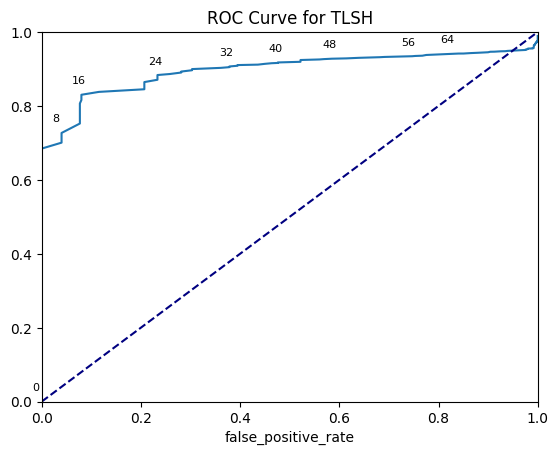

In [66]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for TLSH", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0], 8):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8, xytext=(-7, 8), textcoords='offset points')
    if i > 60:
        break
plt.show()

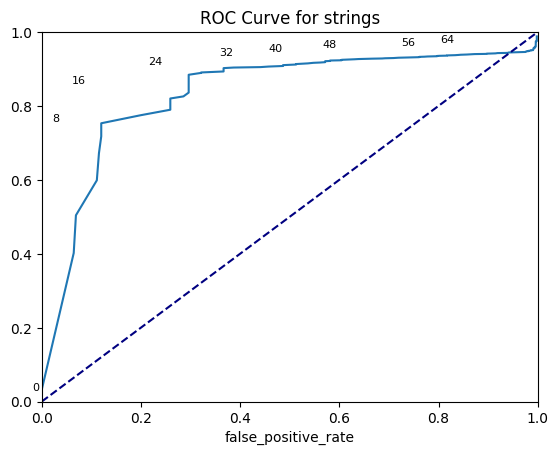

In [67]:
s.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for strings", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0], 8):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8, xytext=(-7, 8), textcoords='offset points')
    if i > 60:
        break
plt.show()

With a threshold of 14 we get the best ratio of true positive rate and false positive rate. The true positive rate is 0.81 and the false positive rate is 0.19.

# SSDEEP
## Prediction

First I will define a function that will predict the family of a sample based on the score of the comparison. The score is the maximum score of the comparison of the sample to all other samples. If the score is 0, there is no match and the prediction is "No Match". If the score is higher than 0, the prediction is the family with the highest score, based on the threshold. Second, I will define a function that will calculate the ROC curve based on the predictions on the given thresholds.

In [68]:
def ssdeep_comb(df=scicore_concat):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['ssdeep', 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = ssdeep.compare(row1['ssdeep']["ssdeep"], row2['ssdeep']["ssdeep"])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['malware'], row2['malware'], row1['ssdeep']['ssdeep'], row2['ssdeep']['ssdeep'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['ssdeep']['ssdeep'], row2['ssdeep']['ssdeep'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'ssdeep 1', 'ssdeep 2', 'Diff Score'])
    
    return results_df

In [69]:
result_ssdeep = ssdeep_comb(df=scicore_filtered)

In [70]:
result_ssdeep

,Family 1,Family 2,Malware 1,Malware 2,ssdeep 1,ssdeep 2,Diff Score
0,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,24576:N7RayWHeZhpVZNmHQ/0R223Vcqemo8hS1QOq:ray...,0
1,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMceRe/ai8Qt5vj...,0
2,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,24576:39vHSut4l6xFkIRp1IzwbIPGVildRLdJNyZJfkD7...,0
3,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3wy70rsnt/amM...,0
4,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,96:mKNT20vsihw3tngiBbGBsek3Kfy2wy3wy70rsnt/amM...,0
...,...,...,...,...,...,...,...
1380286,help2man,help2man,False,False,384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeLLK9qj9OLUAg5...,384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSeLLK9qj9OLUAg...,80
1380287,help2man,help2man,False,False,384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeLLK9qj9OLUAg5...,384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeLLK9qj9OLUAg5...,94
1380288,help2man,help2man,False,False,384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSeLLK9qj9OLUAg...,384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSeLLK9qj9OLUAg...,99
1380289,help2man,help2man,False,False,384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSeLLK9qj9OLUAg...,384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeLLK9qj9OLUAg5...,82


In [71]:
s = result_ssdeep.loc[result_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
size = s.shape[0]
s = s[s["Malware 2"] == False]
s = s[s["Diff Score"] > 60]
(s["Family 1"] == s["Family 2"]).sum() / s.shape[0]


0.8611898016997167

The absolute true positive rate is 23% for any threshold higher than 0 with noise.

In [72]:
comp_to_sci = result_ssdeep[result_ssdeep["Malware 2"] == False]
compt_to_malware = result_ssdeep[result_ssdeep["Malware 2"] == True]
(comp_to_sci["Family 1"] == comp_to_sci["Family 2"]).sum()

1549

In [73]:
def ssdeep_thresh(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = ssdeep_thresh(ssdeep_comb())
p

,threshold,true_positive_rate,false_positive_rate
0,0.0,1.000000,1.0
1,1.0,0.888889,1.0
2,2.0,0.888889,1.0
3,3.0,0.888889,1.0
4,4.0,0.888889,1.0
...,...,...,...
105,105.0,0.000000,0.0
106,106.0,0.000000,0.0
107,107.0,0.000000,0.0
108,108.0,0.000000,0.0


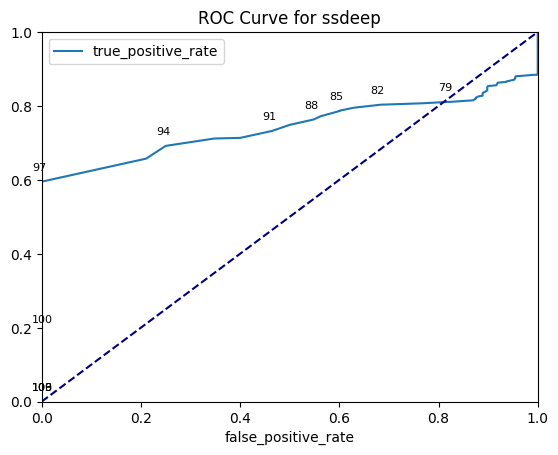

In [74]:
# Plot the ROC curve in range 0.1 to 1.0
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep")
for i in range(p.shape[0]- 1,0, -3):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8, xytext=(-7, 8), textcoords='offset points')
    if i < 80:
        break
# add a dotet line with y = x for comparison
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [75]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 97


In [84]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_comp = result_ssdeep.loc[result_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
string_comp = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]
tls = []
ssd = []
strs = []
for i in range (0,310,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    string_comp_diff = string_comp[string_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Malware 1"] == False]
    string_comp_diff = string_comp_diff[string_comp_diff["Malware 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (string_comp_diff["Family 1"] == string_comp_diff["Family 2"]).sum() / len(string_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(string_comp_diff) / len(string_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh, i))
    strs.append((winrate_str, 1-winrate_str, total_str, i))
for j in range (0,110,10):
    ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Malware 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_comp)
    ssd.append((winrate, 1-winrate, total,j))

<Figure size 640x480 with 0 Axes>

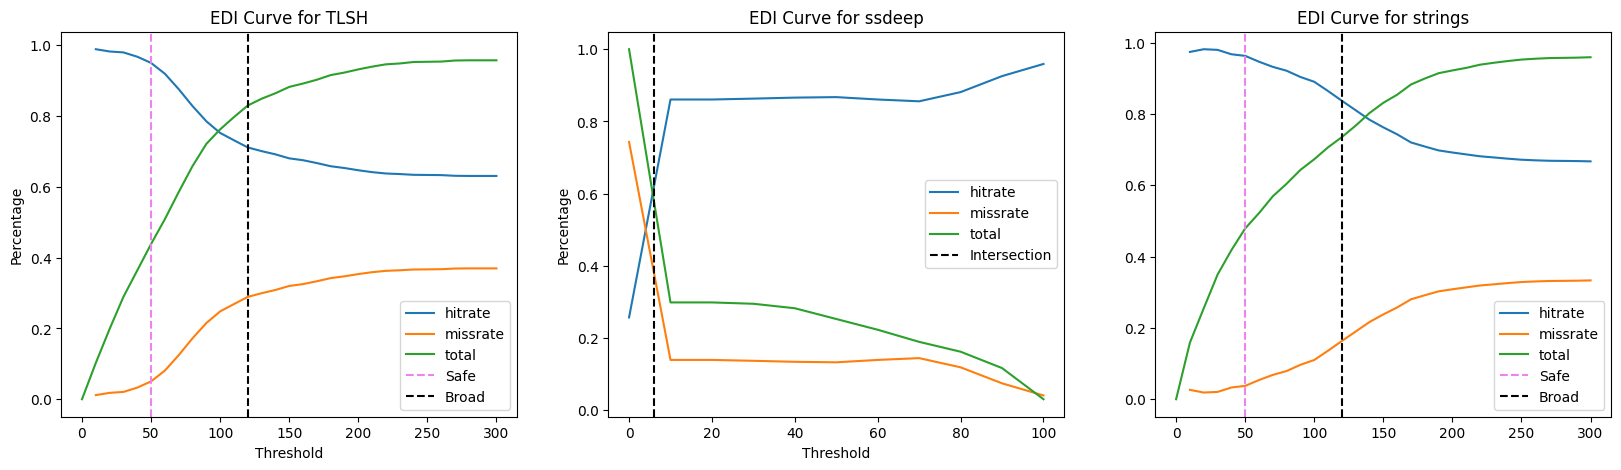

In [85]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
strt = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])
#ti = titi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for TLSH")
#si = sisi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for ssdeep")

plt.clf()
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="hitrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="missrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[0].axvline(x=120, color='black', linestyle='--', label='Broad')
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="hitrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="missrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].axvline(x=6, color='black', linestyle='--', label='Intersection')
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
ax[2].plot(strt["threshold"], strt["winrate"], label="hitrate")
ax[2].plot(strt["threshold"], strt["lossrate"], label="missrate")
ax[2].plot(strt["threshold"], strt["total"], label="total")
ax[2].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[2].axvline(x=120, color='black', linestyle='--', label='Broad')
ax[2].legend()
ax[2].set_title("EDI Curve for strings")
plt.show()